# Homework 7.
made by German Ilya

Download one chomosome of Zebra finch. The chr25 was chosen.

In [10]:
!wget https://hgdownload.soe.ucsc.edu/goldenPath/taeGut1/chromosomes/chr25.fa.gz -O zebra_finch_chr.fa.gz -q
!gunzip zebra_finch_chr.fa.gz

In [2]:
!head zebra_finch_chr.fa

>chr25
agctcggtacccggggatcccacggaGCGAGGGCTGCCCGGACCCCCTCC
TGATGTATTTTTAGTCCTTTCCTTATAAGGTTCCCACGAATTTTTGGGAG
CTGCGAGAGGAATGAAGTCATCGCTGAGGTCATCCCGCCTCATCCCCCTC
CCGGCTCACCCCACAGGGAGGTTTTTGTGTGGCCTCCATTGAAAATCCCC
TCGGCCAGGCCGGGAGGAAACAAAACCCTTCCCTGGCTGGCggggggcca
ggctgcggggggtggggggCTCTGAGAGCTCCAGCCCGGGCAACAATTGG
CAGCAccccccaggaccccctgcccccccTTTGCACACCACAGTGGGTGC
TGCCCGTGGGGCCTGGAACACTCTGCTTGGGGCTGATGGAATTTGGGACc
aagctgcagccccagccagggcactTATGGGGTGACCCAGGCACCCAAGT


#### Find how many z-DNA segments in sequence.

Download and set up Z-Hunt.

In [3]:
!wget https://github.com/ilyagerman52/bioinformatics/raw/main/homework7/zhunt3-alan.c -O zhunt3-alan.c -q

In [ ]:
!gcc zhunt3-alan.c -lm -o zhunt3
!chmod +x zhunt3
!./zhunt3 12 8 12 zebra_finch_chr.fa

Whatch results using pandas:

In [20]:
from sqlalchemy.pool import reset_commit
import pandas as pd
res = pd.read_csv("zebra_finch_chr.fa.Z-SCORE", skiprows=1, names=["Start", "End", "1", "2", "3", "Z-Score", "Seq", "4"], delim_whitespace=True)

Check limit z-score=350:

In [32]:
zDNA = res.loc[res['Z-Score'] >= 350]
zDNA

,Start,End,1,2,3,Z-Score,Seq,4
4845,4846,4868,22,22.006,12.369,406.0069,gtagttgtggggcagcgcgcgc,SASASASASASASASASASASA
4847,4848,4868,20,21.382,19.637,848.0313,agttgtggggcagcgcgcgc,SASASASASASASASASASA
4849,4850,4868,18,20.943,26.725,1468.0250,ttgtggggcagcgcgcgc,SASASASASASASASASA
4850,4851,4875,24,21.689,34.253,586.3828,tgtggggcagcgcgcgcagcacgc,ASASSASAASASASASASSASASA
4851,4852,4868,16,20.583,34.298,2343.8390,gtggggcagcgcgcgc,SASASASASASASASA
...,...,...,...,...,...,...,...,...
1258562,1258563,1258579,16,22.107,33.305,361.8423,gccccacgcgtggctc,SAASASASASASSASA
1258564,1258565,1258581,16,22.110,30.569,360.5965,cccacgcgtggctcgg,ASASASASASSASASA
1258926,1258927,1258943,16,21.944,50.419,435.7484,cgggtgcgggcccggg,ASASASASASASASAS
1270243,1270244,1270260,16,22.095,40.677,366.6196,tgcatgcacggagacg,ASASASASASASASAS


As we can see, there are 3318 rows, that reject 3318 z-DNA segments.

#### Find the number of quadruplexes in genome.

Install BioPython to use it for finding quadruplexes.

In [24]:
!pip install biopython -q

Import all necessary libraries.

In [25]:
from Bio import SeqIO
import re

Find quadruplexes.
The pattern $\texttt{?:G\{3,\}[ATGC]\{1,7\})\{3,\}G\{3,\}}$ is looking for a sequence that matches the following criteria:

- It starts with at least 3 consecutive G's (or g's)
- This is followed by between 1 and 7 characters that can be any nucleotide (A, T, G, C, or U)
- This pattern (3 consecutive G's followed by variable length sequence of A/T/G/C/U) repeats at least 3 times
- Finally, the sequence ends with at least 3 consecutive G's (or g's)

In [51]:
fasta_sequence = SeqIO.parse("zebra_finch_chr.fa", 'fasta')
for seq in SeqIO.parse("zebra_finch_chr.fa", "fasta"):
    print(seq.id, len(seq)) # if there are more then one sequence in file, we will know that (but it's the only seq in file)
    name, sequence = seq.id, str(seq.seq)
pattern="(?:G{3,}[ATGC]{1,7}){3,}G{3,}"
quad = []
for fit in re.finditer(pattern, sequence):
    quad.append([fit.start(), fit.end(), fit.group(0)])

print(len(quad))

chr25 1275379
171


As we can see, there are 171 quadruplexes.

#### Find regions of genome that contains z-DNA segments and quadruplexes.

Using [TableBrowser](https://genome.ucsc.edu/cgi-bin/hgTables) get $\texttt{output.tsv}$ with description.

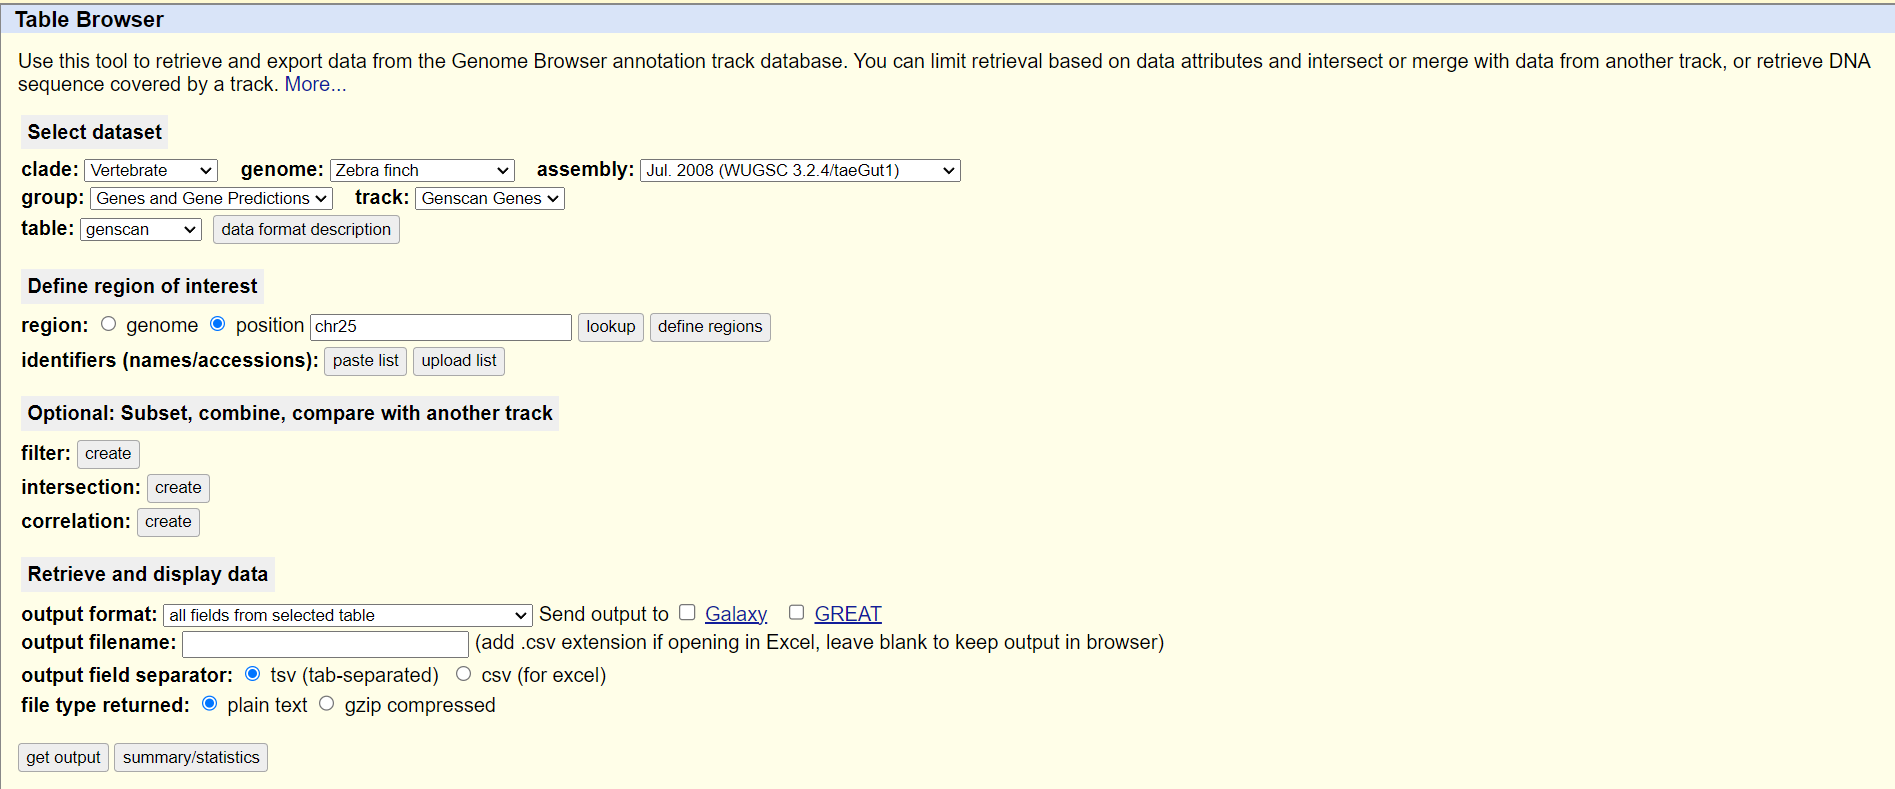

Open result and parse it.

In [29]:
!wget https://github.com/ilyagerman52/bioinformatics/raw/main/homework7/output.tsv -O output.tsv -q

In [33]:
out = pd.read_csv("output.tsv", sep='\t')
out

,#bin,name,chrom,strand,txStart,txEnd,cdsStart,cdsEnd,exonCount,exonStarts,exonEnds
0,585,chr25.1,chr25,-,1153,5046,1153,5046,3,"1153,4282,4994,","1461,4365,5046,"
1,585,chr25.2,chr25,+,7605,50200,7605,50200,10,"7605,8446,8902,9149,12772,13622,38933,41848,47...","7700,8572,8957,9218,12865,13810,39019,41966,47..."
2,585,chr25.3,chr25,-,53911,71683,53911,71683,2,"53911,71373,","54057,71683,"
3,585,chr25.4,chr25,+,88939,101263,88939,101263,2,"88939,101117,","89033,101263,"
4,73,chr25.5,chr25,-,105755,156036,105755,156036,10,"105755,111286,115387,117854,122875,126457,1355...","106081,111416,115408,117929,122983,126595,1357..."
...,...,...,...,...,...,...,...,...,...,...,...
70,594,chr25.71,chr25,+,1221155,1229052,1221155,1229052,6,"1221155,1222684,1223765,1225301,1228415,1228898,","1221306,1222847,1223839,1225422,1228574,1229052,"
71,594,chr25.72,chr25,+,1229453,1234736,1229453,1234736,8,"1229453,1230291,1230613,1231686,1231901,123279...","1229902,1230408,1230783,1231832,1232128,123281..."
72,594,chr25.73,chr25,-,1235143,1247148,1235143,1247148,13,"1235143,1238577,1238834,1239017,1239300,124016...","1235233,1238731,1238932,1239146,1239393,124027..."
73,594,chr25.74,chr25,+,1251941,1254196,1251941,1254196,9,"1251941,1252322,1252510,1252889,1253147,125341...","1251980,1252427,1252716,1253074,1253258,125350..."


For each z-DNA find place where it is (inside gene, between two genes or partly inside and between).

In [50]:
inside = 0
between = 0
intersect = 0

for z_start, z_end in zip(zDNA["Start"], zDNA["End"]):
    caught = False
    for out_start, out_end in zip(out["txStart"], out["txEnd"]):
        if z_start >= out_start and z_end <= out_end:
            inside += 1
            caught = True
            break
        elif out_start <= z_start <= out_end and z_end > out_end:
            intersect += 1
            caught = True
            break
        elif z_start < out_start and out_start <= z_end <= out_end:
            intersect += 1
            caught = True
            break
    if not caught:
        between += 1     
   
print(f"Inside: {inside}\nBetween: {between}\nIn intersection: {intersect}")

Inside: 2535
Between: 763
In intersection: 20


The same do for quadruplex:

In [53]:
inside = 0
between = 0
intersect = 0

for quad_start, quad_end, _ in quad:
    caught = False
    for out_start, out_end in zip(out["txStart"], out["txEnd"]):
        if quad_start >= out_start and quad_end <= out_end:
            inside += 1
            caught = True
            break
        elif out_start <= quad_start <= out_end and quad_end > out_end:
            intersect += 1
            caught = True
            break
        elif quad_start < out_start and out_start <= quad_end <= out_end:
            intersect += 1
            caught = True
            break
    if not caught:
        between += 1     
   
print(f"Inside: {inside}\nBetween: {between}\nIn intersection: {intersect}")

Inside: 112
Between: 57
In intersection: 2


#### Provide a list of genes whose promoters contain Z-DNA segments.

In [63]:
result_in = set()
for gene_start, strand, gene_name in zip(out["txStart"], out["strand"], out["name"]):
    for z_start, z_end in zip(zDNA["Start"], zDNA["End"]):
        prom_start = max(0, gene_start - 1000) if strand == '+' else gene_start
        prom_end = prom_end = gene_start if strand == '+' else gene_start + 1000
        if z_start >= prom_start and z_end <= prom_end:
            result_in.add(gene_name)
print("Genes with promotes contains z-DNA segments: ", *result_in)

Genes with promotes contains z-DNA segments:  chr25.22 chr25.59 chr25.14 chr25.28 chr25.63 chr25.57 chr25.36 chr25.39 chr25.24 chr25.9 chr25.58 chr25.21 chr25.49 chr25.6 chr25.5 chr25.64 chr25.26 chr25.55 chr25.52 chr25.68 chr25.44 chr25.72 chr25.12 chr25.60


#### Provide a list of genes whose promoters contain quadruplexes.

In [65]:
result = set()
for gene_start, strand, gene_name in zip(out["txStart"], out["strand"], out["name"]):
    for [quad_start, quad_end, _] in quad:
        prom_start = max(0, gene_start - 1000) if strand == '+' else gene_start
        prom_end = prom_end = gene_start if strand == '+' else gene_start + 1000
        if prom_start <= quad_start and prom_end >= quad_end:
            result.add(gene_name)
print("Genes with promotes contains quadruplexes: ", *result)

Genes with promotes contains quadruplexes:  chr25.52 chr25.65 chr25.74 chr25.44 chr25.57 chr25.47 chr25.64 chr25.34


#### Gene Enrichment Analysis

Open [stringDB](https://string-db.org/), find multiple proteins.

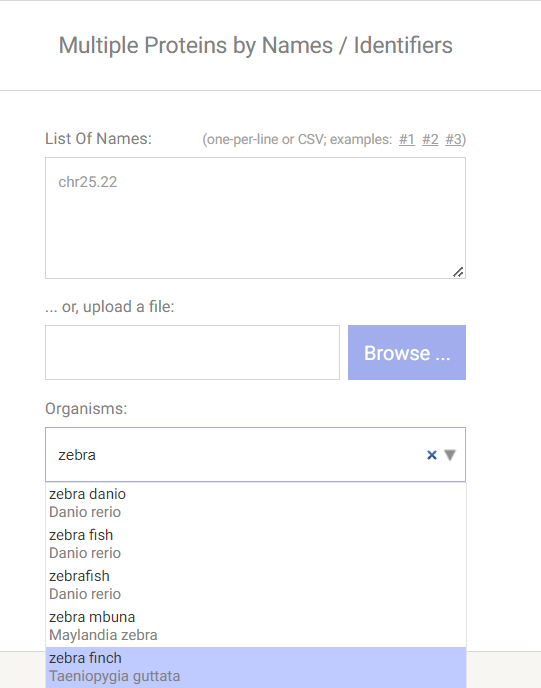

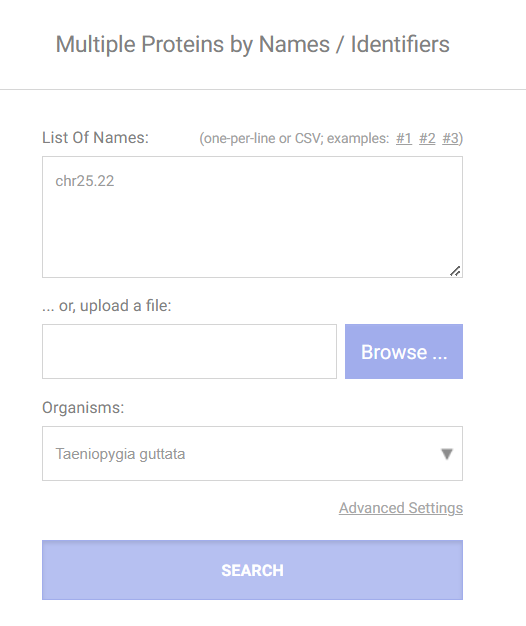

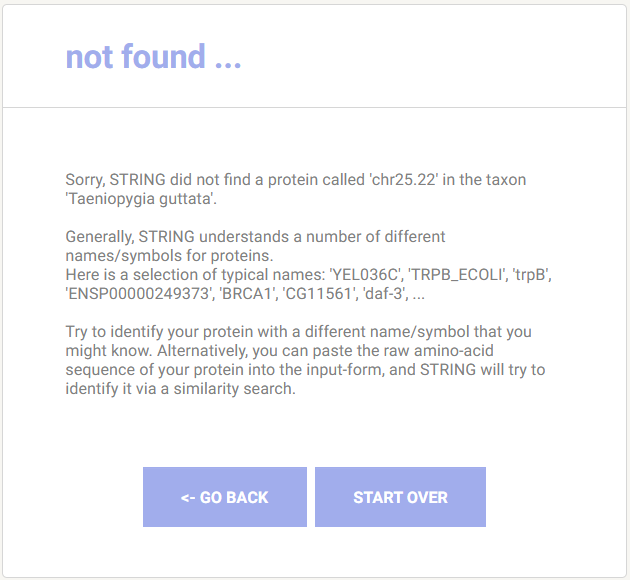

Perhaps, I've chosen wrong organism or chromosome... But I won't redo this homework...